# NET ID: EJL242

# Lecture 8: Linear Classifiers

This week we're discussing linear classifiers, espeically **Perceptron** and **Support Vector Machine (SVM)**.

## Perceptron

Perceptron was developed by American psychologist Frank Rosenblatt in 1957 at the **Cornell** Aeronautical Laboratory. Shout-out to one of our greatest alumni!

Perceptron is a linear binary classifier. So the underlying assumption about the dataset is that there are two labels - i.e. binary labels (conventionally, +1 and -1), and that the two classes should be classified with a linear hyperplane (Although, keep in mind that the [Multi-Layer Perceptron (MLP)](https://en.wikipedia.org/wiki/Multilayer_perceptron) is applicable to non-linearly separable data. We won't cover MLP in this course as it is part of Artificial Neural Networks (ANN), which is not in our scope).

<img src="https://jtsulliv.github.io/images/perceptron/linsep_new.png?raw=True" alt="linsep.png" style="width: 60%;"/>

The Perceptron "learns" a series of weights, each of which corresponds to each input feature, i.e. X of our data. For example, we are given a dataset of dog and cat. The input feature set consists of three columns: weight $x_1$, height $x_2$, and length $x_3$ of each animal. Then Perceptron will keep track of three different weights: $w_1$, $w_2$, and $w_3$. Each pair of input features and weights is multiplied and summed up: $s = w_1*x_1 + w_2*x_2 + w_3*x_3$. If the summed-up result $s$ is greater than a certain threshold, then we predict one class, and if it is less than the threshold, then we predict the other. For example, if our threshold is 0, then we can set it as: if $s > 0$, then the given input feature is a description of (+1) label (i.e. a dog), and if $s < 0$, then it is (-1) label (i.e. a cat). Then Perceptron will check if the predictions made were correct. If some of them were not, then the weights are updated accordingly. This process continues for a certain number of "epochs," or iterations. The end goal is to classify every point correctly by finding a *perfect* linear hyperplane.

The final step is to check if our predictions were classified correctly. If they were not, then the weights are updated using a learning rate. This process continues for a certain number of iterations, known as “epochs.” The goal is to determine the weights that produce a linear decision boundary that correctly classifies the predictions.

<img src="https://cdn-images-1.medium.com/max/1600/1*n6sJ4yZQzwKL9wnF5wnVNg.png" alt="perceptron.png" style="width: 50%;"/>

## Demo 1: Perceptron Learning Algorithm
This algorithm is simple and provides a great intuition for how to use your data to find a great linear binary classifier. The perceptron algorithm is an __iterative__ algorithm. This means that we will constantly update our classifer __w__ until it performs well on our training data. Intuitively, we want use the points that our incorrectly classifies to help develop a better classifer. Lets see how our model improves across iterations:

In [1]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Plots our data points and Classifier
def plot_perceptron(w):
    plt.scatter(X[:,0], X[:,1], color = c)
    left = min(X[:,0])
    right = max(X[:,0])
    if w[2] != 0:
        plt.plot(np.linspace(left, right, num=50), [-(w[2] + w[0]*x)/w[1] for x in np.linspace(left, right, num=50)])
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Perceptron Learning Example')
    plt.show()
    plt.close()

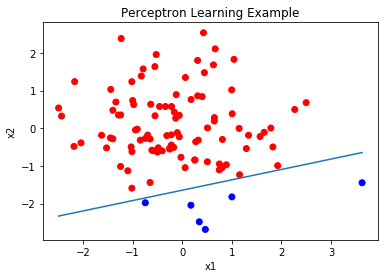

In [3]:
n = 100 # number of data points
X = np.random.randn(n,2) 
offset = np.ones((n,1))
X = np.hstack((X, offset))
w_true = np.random.randn(3,1) 

y = np.sign(X.dot(w_true))
c = []
for i in range(n):
    if y[i] > 0:
        c.append('r')
    else:
        c.append('b')
plot_perceptron(w_true)

#### As you can see above, our goal is to find the line above that linearly separates our blue data points from our red data points. Let's use the perceptron algorithm to do this:

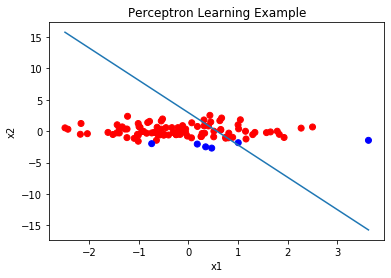

In [4]:
#initialize random normal vector w
w = np.random.randn(3)
#function that returns the index of a point that is missclassifed
def find_missclassified(w):
    for it in range(10000):
        i = np.random.randint(0, n) 
        if y[i]*(X[i,:].dot(w)) <= 0:
            return i
    return None
plot_perceptron(w)

67
Updating perceptron


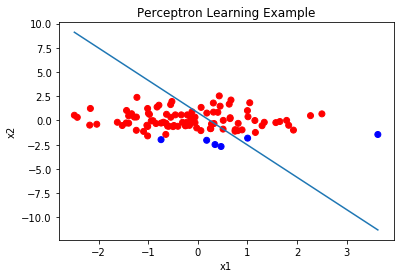

In [5]:
#Run this cell once at a time to see how our classifier improves at each iteration
point = find_missclassified(w)
print(point)
if point is None:
    print("Perfect Classifier!!!")
    plot_perceptron(w)
else:
    print("Updating perceptron")
    w = w + y[point]*X[point, :]
    plot_perceptron(w)

Slowly but surely our classifier is getting better! The intuition behind the perceptron is that we use the incorrectly classified points to change __w__ in order to make better guesses.

## Example 1: Perceptron Learning

Let's create a perceptron to predict whether someone has breast cancer. This is no different from what you've done with models before.

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
X, y = load_breast_cancer(return_X_y=True)
#FILL HERE: Make a test train split of 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#FILL HERE: Create the Perceptron Model
model = Perceptron()
#FILL HERE: Train the Perceptron Model
model.fit(X_train, y_train)
#FILL HERE: Compute the accuracy of your model and print it out
predictions = model.predict(X_test)
print("Train Accuracy: ", accuracy_score(predictions, y_test))

Train Accuracy:  0.9473684210526315


## Support Vector Machine

The Support Vector Machine is another classification method known for its memory-friendly nature. A good way to think about all these machine learning algorithms we have seen is as a set of tools. Each one has its unique advantages and disadvantages, but these tools can oftentimes be used in conjunction with each other. An SVM is almost like a scalpel; it can navigate through complex relationships in high-dimensions, but is best used on smaller subsets of data.

### Basics

We start by assigning each data point a set of "coordinates" called its features. In this way, we can represent the data in some n-dimensional feature space as a set of points. The basic goal is to find a **hyperplane**, that is, an (n-1)-dimensional plane that best seperates the data points. A **support vector** is the position vector of a point close to this hyperplane of seperation.

![image](http://dni-institute.in/blogs/wp-content/uploads/2015/09/SVM-Planes.png)


Consider a 2-dimensional case. This means that we represented the data in terms of two features. We want to find a separation hyperplane that separates the data points into two sets.

In 2-dimensions, our hyperplane of interest is simply a line of the form $mx + b$. We want to try and tweek $m$ and $b$ to find the best line of seperation.

Yet in the case where there is no clear line to draw (because of multiple outliers), we might need to **ignore** some misclassified data points to certain degree.

This is because it maximizes the **margin** - the distance between the hyperplane and the closest support vectors.

The support vector machine does this process for us. It finds the best hyperplane to separate the data points.

### To Reiterate...

Pros:
* Effective in high dimensions
* Uses a subset of data, thus is memory efficient

Cons:
* Bad on large training sets, due to long training time
* Sensitive to noise

## Example 2: Classifying Iris Species

We will use SVM to predict the iris species. You can read more about the dataset <a href="https://en.wikipedia.org/wiki/Iris_flower_data_set">here</a>.

In [7]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets

In [8]:
# here we use the iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2] 
Y = iris.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [9]:
# create an SVC model using svm.SVC(<parameters>). For parameters, use kernel='linear' and gamma=1. Choose a C
# between 0 and 1 that gives a score **greater than** 0.8.
model = svm.SVC(kernel='linear', gamma=1, C=0.1)
# fit the model to the training data provided in the cell above
model.fit(X_train, Y_train)
# test the score of the model using the SVC's score function
predictions = model.predict(X_test)
print("Train Accuracy: ", accuracy_score(predictions, Y_test))

Train Accuracy:  0.8222222222222222


## Margins

Given a dataset 

<img src = "http://www.eric-kim.net/eric-kim-net/posts/1/imgs/dataset_linsep.png" width = 500>

How do we separate the blue dots from the red dots? One way is to draw a straight line between the two classes, separating them. However, there are an infinite number of straight lines we can draw from this graph, so which line should we pick? 

One reasonable choice would be the line that gives the largest separation between the two classes. This separation is called the **margin**, and in **maximal margin classifiers**, we want to maximize the margin. In other words, we want to maximize the distance between the hyperplane (a line in our case) and the closest point(s) in each class.

These points are called **support vectors** and they help us find where our hyperplane lies. 

### Hard Margins
Our hyperplane may not always be perfect, especially when our dataset is not linearly separable. In such cases, we want to introduce the **cost function**: 

$$-log(1-\frac{1}{1+e^{cx}})$$

It looks like an exponential function and the coefficient c will change how fast the value increases. This function dictates how much to penalize support vectors for being mislabled. If the penalty value (namely $c$) is high, then the svm is **hard margin**.

Let's look at specific case. The graph below shows the hyperplane between two classes, blue are red. As you can see, the existence of one (red) outlier drasticaly changes the hyperplane. 

<img src = "http://yaroslavvb.com/upload/save/so-svm.png" width = 250/>

If we were to use a **hard margin** SVM, we would have a high penalty value and the resulting hyperplane would be dictated by that one red outlier. 

### Soft Margins
You might have realized that, in the example above, it is better to allow one outlier to fall on to the wrong side rather than letting that one outlier dictate the position of our hyperplane. We can achieve a "more balanced" hyperplane that lies more or less right in the middle of the two classes, by having a low $c$ value. This is called a **soft margin support vector machine**.

Especially in non-linearly separable datasets, it is generally better to use a soft margin SVM. In this case, we introduce the **hinge loss function**: 

![image](https://wikimedia.org/api/rest_v1/media/math/render/svg/53b729df53f32c7fbf933b1b034a8e368037d9b5)

where $y_i$ is either 1 or -1, indicating the class to which $x_i$ belongs, and $w$ is the vector normal to the hyperplane.

<img src = "https://upload.wikimedia.org/wikipedia/commons/2/2a/Svm_max_sep_hyperplane_with_margin.png" width = 300>

The regularization constant controls how "soft" the margins are. 

## The Restrictions of Linearity - Introducing Kernels

Having talked about the function of a support vector machine and the methodology behind it, we now move on to a critical limitation of SVMs: **linearity**. See, an SVM is a member of a class of machine learning models known as **linear classifiers**, an entire class of functions which fit lines or hyperplanes to classify data. Herein lies the problem: linear classifiers fit *straight* lines to the data, but quite often the underlying decision boundary between the classes is anything but.

To illustrate why this is such an issue, imagine cluster of points of class A, surrounded by a ring of points of class B. Now, attempt to draw a straight line with a ruler so to separate those to classes. Such a task is nigh impossible. 

<img src = "https://codingmachinelearning.files.wordpress.com/2016/07/capture6.jpg?w=723" width = 500>

However, this doesn't mean that the two classes are inseparable. In fact, we can simply use an oval shape to separate the two classes.

And here comes the problem, how do we find this oval that separates our two classes? 

One way to resolve this dilemma is to transform the data into a linearly separable dataset.

Now we can easily find the separating hyperplane! After finding this hyperplane, we can project the data back into its original form, alnong with the now non-linear decision boundary.

As the title of this section may suggest, to achieve this goal we resort to using a class of functions called **kernel functions**. Kernel functions are used internally within the model to compare data points; each kernel function represents a different measure of similiarity, even simulating the similarity of two points in a higher dimensional space than the one they currently occupy. This is important to note, as while the data might not be separatable in their current form, a different perspective may make all the difference.

### Radial Basis Functions

Now, if you recall back to the example given early in the notes, you may remember the keywork "kernel = 'linear'" appearing. This kernel is the vanilla ice cream of kernels - the default flavor, not particularly interesting, but still good to have sometimes.  The problem posed above is, as we've said, not one of those times. Instead we're going to reach for another flavor of kernel function, known as a **Radial Basis Function**.

A radial basis function is actually a class of functions that all have the same property: the value they return relies **only** on radial distance from the origin (*cough* *cough* kinda like the definition of a circle *cough*). Plugging this into our SVM model will cause the decision boundary generated to take on curvature, even circular patterns if the data is just right. Let's take a look at an example of scikit's RBF in action:

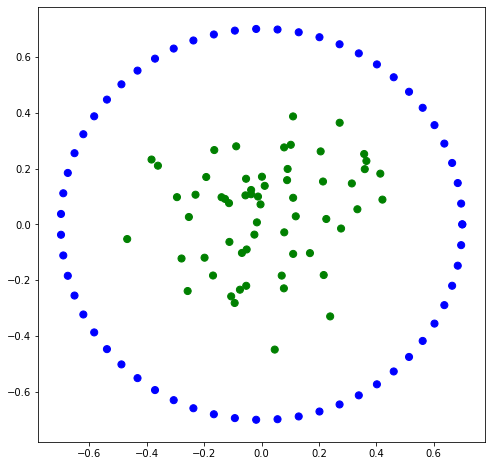

In [10]:
%matplotlib inline
import matplotlib
# Let's generate some data to use
pointsA = np.random.normal(size=(60,2), scale=.2)
theta = np.expand_dims(np.linspace(0,2, 60) * np.pi, axis=1) 
pointsB = np.concatenate([np.cos(theta), np.sin(theta)], axis=1) * .7

data = np.concatenate([pointsA, pointsB], axis=0)
labels = np.zeros(120)
labels[:60] = 0
labels[60:] = 1


colors=["green", "blue"]

plt.figure(figsize=(8,8))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=matplotlib.colors.ListedColormap(colors), s=50)

plt.show()

In [11]:
# Let's train two SVMS, one using a linear kernel and one using RBF
clfLIN = svm.SVC(kernel='linear', C=1,gamma=1)
clfRBF = svm.SVC(kernel='rbf', C=1,gamma=1)

clfLIN.fit(data, labels)
clfRBF.fit(data, labels)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

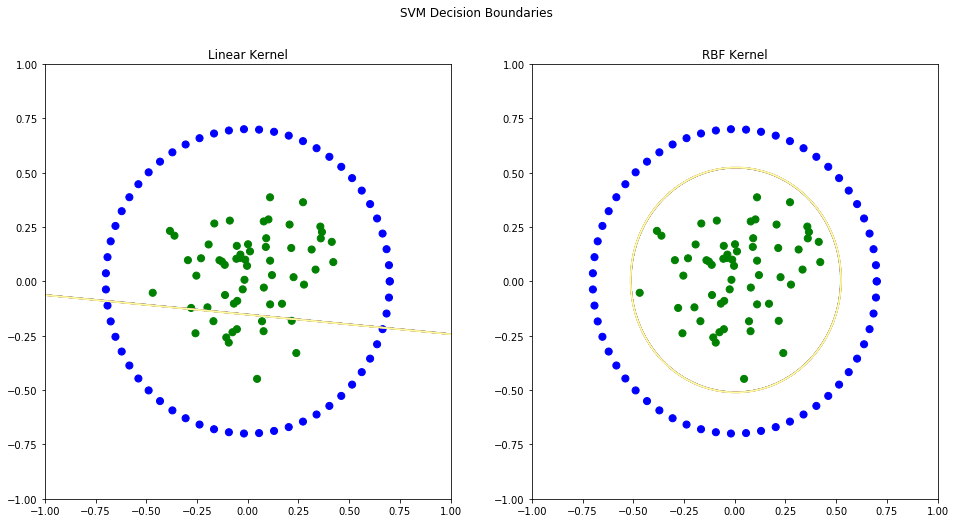

In [13]:
%matplotlib inline
# Now lets plot the decision boundaries generated by both models and see which worked better

# Ignore, drawing decision boundaries is a pain :(
h = .001
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

plt.figure(figsize=(16,8))
plt.suptitle("SVM Decision Boundaries")

plt.subplot(121)
Z = clfLIN.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=matplotlib.colors.ListedColormap(colors), s=50)

plt.title("Linear Kernel")
plt.axis([-1,1,-1,1])

plt.subplot(122)
Z = clfRBF.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=matplotlib.colors.ListedColormap(colors), s=50)

plt.title("RBF Kernel")
plt.axis([-1,1,-1,1])

plt.show()

As you can see, the Radial Basis Function kernel was far superior at separating the classes for the non-linear decision boundary. This is an extreme example, of course, where the classes are quite literally oriented in a circle, but RBF would still be the superior choice with any curved decision boundary. However, there is an exception to that statement.

### Polynomial Kernels

The exception mentioned above is simply when the decision boundary could best be modeled by a polynomial curve - in cases like this, the best option is to use the "polynomial" kernel in scikit learn. More on this can be found here: http://scikit-learn.org/stable/modules/svm.html#kernel-functions

## Example 3: Fitting Parameters - GridSearchCV

We previously talked about two parameters: gamma and C. The question then becomes how to determine these values when training a model. This is especially true because different values can give vastly different models, as seen previously. The manual way to perform parameter fitting would be to iterate over all possible combinations of C and gamma. Luckily, there is a sklearn function for this: GridSearchCV.

Here we will revisit the Iris Species Classification from above. Set Cs, gammas, and param_grid to set up a GridSearch that will get you a score of at least 70%.

In [21]:
# import necessary packages
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm, datasets

# here we use the iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2] 
Y = iris.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

# here is a hardcoded C and gamma
model = svm.SVC(kernel='linear', C=0.01,gamma=1)
model.fit(X_train, Y_train)
model.predict(X_test)
print("Model score for hard coded parameters: ", model.score(X_test,Y_test))

# give the grid search options to iterate over
Cs = [i/10 for i in range(0,10)] # fill in this list with possible values you want to search over
gammas = [i/10 for i in range(0,10)] # fill in this list with possible values you want to search over
param_grid = {'C' : Cs,
             'gamma' : gammas} # fill in this dictionary. to contain Cs and gammas. 
                # See documentation for sklearn.model_selection.GridSearchCV for an example.
# create the GridSearch model
grid_search = GridSearchCV(svm.SVC(kernel='linear'), param_grid)
# fit the model
grid_search.fit(X_train, Y_train)

# we use the grid search parameters
model = svm.SVC(kernel='linear', C=grid_search.best_params_['C'],gamma=grid_search.best_params_['gamma'])
model.fit(X_train, Y_train)
model.predict(X_test)
print("Model score for grid search parameters: ", model.score(X_test,Y_test))

Model score for hard coded parameters:  0.3111111111111111


/Users/eliaslittle/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/eliaslittle/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: C <= 0

The model performed better with the grid search parameters than with arbitrarily chosen parameters. 

Additionally, the parameter options to iterate over must be given to the grid search. This means that if you give the model more values, you will get more accurate parameters. However, grid search will take longer to run then.